In [1]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

### Properties

In [2]:
#read the properties csv using the pandas read_csv() method
properties_raw_data = pd.read_csv('properties.csv', index_col = 0)

In [3]:
# here are the data types
properties_raw_data.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

### Customers

In [4]:
#read the properties csv using the pandas read_csv() method
customers_raw_data = pd.read_csv('customers.csv', index_col = 0)

In [5]:
customers_raw_data.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

# Data Cleaning and Preprocessing

## Properties

In [6]:
# Creating a new variable that replicates the original data is crucial. 
# This allows us to rerun the code from this point if required.

properties = properties_raw_data.copy()

# This is effectively a natural 'checkpoint' in our data processing.
# Moving forward, we'll manipulate the 'properties' variable and refrain from touching 'properties_raw_data'.
# This ensures that we always have access to the pristine data if we need to revert our changes.
# Often, developers refer to such variables as 'properties_backup' or similar, 
# indicating that it holds a safeguarded copy of the original data.

In [7]:
# properties.describe() method allows us to examine statistical summaries of the data.
# However, by default, it only includes numeric columns. 
# To include all variables, we specify 'include=all' in the parameter. 

properties.describe(include='all')

# At first glance, the 'ID' column seems to be well-populated with no missing values.
# However, the nature of IDs often renders them insignificant in analysis as they serve merely as identifiers.
# The absence of 'unique', 'top', and 'freq' values suggests that 'ID' may be numeric.
# The presence of mean and standard deviation further supports this assumption, 
# since these are common statistical measures for numerical columns.

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [8]:
# This is a good time to check the data types

properties.dtypes

# Confirming our earlier hypothesis ID seems to be of integer type

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [9]:
# # having ID as an integer is sometimes confusing, sometimes dangerous
# # we will never treat an ID as a numeric variable, so let's change the data type 
# # we will cast it as string so no numerical operations can be performed on it
#properties['id'] = properties['id'].astype(str)

# # unfortunately we get an error when we execute the code above
# # pandas does not recognize the column name 'id'

In [10]:
# To better understand the issue, let's take a closer look at the column values. 
# Although we can access these values through the 'values' attribute, it's not recommended with newer versions of pandas.

# Instead, we'll use the 'array' attribute to inspect the column values.
properties.columns.array

# It appears we've stumbled upon an encoding issue.
# During data collection, we've unintentionally fetched the byte order mark (or BOM) along with the actual data.
# This is essentially metadata that doesn't hold any value for us and indeed, isn't visible when we display the data.

<PandasArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [11]:
# To address this issue, we have a couple of options: we could revisit the data collection phase or simply rename the column. 
# There are various ways to rename a column, but one straightforward method is to use the 'rename' function. 
# This function accepts a dictionary as an argument, mapping the original column names (keys) to their new names (values).
properties = properties.rename(columns= {'\ufeffid':'id'})
# Let's preview our dataset to confirm the changes.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [12]:
# Excellent, with the column name issue resolved, we can now proceed to convert 'id' to a string.

# As discussed earlier, maintaining 'ID' as an integer can lead to confusion or unintended operations. 
# Since 'ID' serves as an identifier rather than a numeric variable, it's best to change its data type.
# By converting it to a string, we ensure no numerical operations can be inadvertently performed on it. 
properties['id'] = properties['id'].astype(str)
# Let's examine the 'id' column to confirm our changes.
properties['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [13]:
# The same applies for the 'building' and 'property#' variables
properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)

# let's check the new data types
properties.dtypes

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [14]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


In [15]:
# Observing that all variables, except 'area', are of the 'object' data type might raise some concerns.
# We previously encountered columns like 'id', 'building', and 'property#' that were initially interpreted as integers 
# but required conversion to strings.
# This invites the question whether there might be other variables incorrectly classified as 'object' type.

# To investigate this, let's proceed methodically.
# Focusing on 'date of sale', we notice several issues:
# Among 267 entries, there are 44 unique ones, which is unusual and warrants a closer look.

properties['date_sale'].unique()

# Our investigation reveals multiple problems:

# 1. Some entries are '#NUM!', a placeholder for missing or erroneous values, likely carried over from an Excel file.

# 2. Every date is listed as the first of the month, regardless of the actual month. 
# This suggests that our data may only include information about the month of the transaction, rather than the precise date.

# 3. The 'date_sale' Series is currently classified as an 'object' type, 
# meaning the dates are treated as strings instead of actual dates.

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [16]:
# Let's address these issues step by step.
# The first task is to replace the Excel-specific missing value indicator '#NUM!' with a format 
# that pandas can understand as a null value, i.e., 'pd.NA'.
# A convenient way to implement this substitution is using the 'np.where' function from the NumPy library.
properties['date_sale'] = np.where(properties['date_sale']=='#NUM!', pd.NA, properties['date_sale'])

# Please note, 'pd.NA' appears as '<NA>' when displayed.

# Upon rechecking the unique entries, we can observe that the '#NUM!' placeholders have been successfully replaced with 'pd.NA'.
properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [17]:
# The next step is to convert the 'date_sale' column to a date type. 
# This makes subsequent manipulations and analysis easier.
properties['date_sale'] = pd.to_datetime(properties['date_sale'])
# Let's review the changes.
properties['date_sale']

# Note that the default precision of datetime is nanoseconds, represented as '[ns]'.
# Also, since we're using the dedicated pandas null type, 'pd.NA', 
# the datetime function knows to convert these into 'NaT' (not a timestamp).

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [18]:
# After the conversion, we see that the total count of 'date_sale' entries is now 195, while unique values count dropped to 43.
# This change is due to the replacement of empty strings with 'NaT', 
# resulting in one less unique value and a total of 72 (267-195) missing values.

properties.describe(include="all", datetime_is_numeric=True)

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


In [19]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [20]:
# Now, let's turn our attention to the 'type' column. 
# Although it appears to be well-formatted, we'll standardize it further by converting all its entries to lowercase.
# This can be achieved using the .lower() method applied on the string representation of the column.

properties['type'] = properties['type'].str.lower()

In [21]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [22]:
properties.dtypes

# interestingly, price is also of object type and we definitely want it to be a float

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [23]:
# the reason for this is the $ sign, so let's strip it 
# instead of overwriting the price, let's create a new Series 'price$'
properties['price$'] = properties['price'].str.strip('$')
properties.head()

# The '$' symbol in the 'price' column is causing it to be treated as a string. 
# To fix this, we'll strip the '$' sign and create a new Series 'price$'.
properties['price$'] = properties['price'].str.strip('$')
# Let's take a peek at the dataset to see the changes.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [24]:
# Next, we intend to convert the 'price$' column to a float data type.
#properties['price$'] = properties['price$'].astype(float)

# Unfortunately, we encounter an error because of the thousands separator ',' still present in the data.

In [25]:
# Since the .strip() method only removes characters from the beginning and end of a string, 
# we need a different approach to remove symbols located in the middle.
# The .replace() method is apt for this task, replacing all instances of ',' with an empty string.
# It's important to set regex=True here, as the comma has several interpretations in Python.
properties['price$']= properties['price$'].replace(",","",regex=True) 
# Let's preview the data once more to check our progress.
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [26]:
# now we can carry on with casting price into a float
properties['price$'] = properties['price$'].astype(float)

In [27]:
# I believe we can now safely drop price from our dataframe
properties = properties.drop(['price'],axis=1)
properties.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


In [28]:
# We can also check the data types at this point
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price$               float64
dtype: object

In [29]:
# The next column for review is 'status', which is critical to our analysis.
# Let's examine the unique values in this column. 

properties['status'].unique()

# Good news: there don't appear to be any missing values.
# However, we notice some inconsistencies: the word 'sold' is surrounded by spaces and is capitalized, 
# which may not be ideal for data uniformity and analysis.

array([' Sold ', '-'], dtype=object)

In [30]:
# To ensure uniformity and ease of analysis, we'll remove the surrounding spaces using the .strip() method 
# and convert the text to lowercase.
properties['status'] = properties['status'].str.strip()
properties['status'] = properties['status'].str.lower()

# Let's examine the unique values again to confirm our changes.
properties['status'].unique()

array(['sold', '-'], dtype=object)

In [31]:
# regarding the alternative: "-" it most definitely means 'not sold yet'

# Now, there are two statuses - 'Sold' or '-'
# The dash is a rather strange symbol to have, though

# It make sense to me to change the name of "status" to "sold"
# and then change the values to 1s and 0s so they could be Boolean or at least binary

properties = properties.rename(columns= {'status':'sold'})

# The symbol '-' likely represents properties not yet sold.

# Currently, we have two statuses: 'sold' and '-'. However, using a dash to represent unsold properties is somewhat unusual.

# A more intuitive approach might be to rename the 'status' column as 'sold' and change its values to 1s (for sold properties)
# and 0s (for unsold properties), essentially creating a binary classification.

properties = properties.rename(columns= {'status':'sold'})



In [32]:
# To implement this, we can use the .map() method. This method is often used in data science to provide a numeric representation
# of categorical data, allowing mathematical operations.Like .rename(), .map() is applied to a Series and takes a dictionary 
# as an argument, where the keys represent the original values and the dictionary values are the new values.
# Unlike '.rename()', however, we need to specify all distinct options as keys. 
# Any options not explicitly mapped will be transformed into NaN.

properties['sold'] = properties['sold'].map({'sold':1,'-':0})
# Let's view the unique values in 'sold' to confirm our transformations.
properties['sold'].unique()

array([1, 0], dtype=int64)

In [33]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
sold                   int64
customerid            object
price$               float64
dtype: object

In [34]:
# finally we can check for missing values
properties.isna().sum()

# it seems there are none (apart from date of sale)
# to check if that's true, you can investigate each column with the .unique() method

# It's time to check for missing values in our cleaned dataset.
properties.isna().sum()

# From the initial glance, it seems there are no missing values, apart from the 'date_sale' column. 
# To be certain, you can verify this by inspecting each column with the .unique() method.

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [35]:
# To wrap up the cleaning process, let's take a look at our final, tidied dataset.
properties

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [36]:
# For convenience and to avoid having to scroll up every time, let's create a copy of the raw customer data.
customers = customers_raw_data.copy()

In [37]:
# Let's peek into the structure of the dataset by inspecting the column names. 
# While we could use the .values attribute to do this, newer versions of pandas recommend using the .array attribute instead.
customers.columns.array

# Without further examination of the file, we'll commence by scrutinizing the column structure.
# We already suspect that pandas might have interpreted the JSON format in an unusual manner.
#customers.columns.values

<PandasArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [38]:
# rename customerid in an appropriate way
customers = customers.rename(columns= {'\ufeffcustomerid':'customerid'})
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [39]:
# Let's get an overview of our data. First, we'll examine the descriptive statistics of all variables.
customers.describe(include="all")

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [40]:
# Next, let's check the data types of our variables.
customers.dtypes

customerid           object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [41]:
# A glance at the top of the table suggests the presence of missing values, so we need to verify this.
customers.isna().sum()

# Surprisingly, it appears there are no missing values. This might be due to all values being stored as strings.
# Hence, we'll reserve this verification step for a later stage in our analysis.

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [42]:
# We'll start by renaming 'entity' and 'purpose' to names that could potentially represent an indicator variable.
customers = customers.rename(columns= {'entity':'individual'})
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [43]:
# Next, let's focus on the 'individual' variable and observe its unique values.
customers['individual'].unique()

array(['Individual', 'Company'], dtype=object)

In [44]:
# To make 'individual' a Boolean-like variable (at least conceptually), let's map 'Individual' to 1 and 'Company' to 0.
customers['individual'] = customers['individual'].map({'Individual':1,'Company':0})

In [45]:
# Now, let's examine the 'sex' variable.
customers['sex'].unique()

# It appears there are three options: 'F', 'M', and an empty string. 
# We should map the empty string to NaN to indicate missing data.

array(['F', 'M', nan], dtype=object)

In [46]:
# We want to keep 'sex' as an 'object' variable, so we'll map 'F' and 'M' to '1' and '0' respectively. 
# We'll use string format, not integers.
customers['sex'] = customers['sex'].map({'F':'1','M':'0', '':pd.NA})

# Please note, if we used the np.where method here, it would have modified our data in an undesirable way.
# All missing values would fall into the 'other' category, which in this case is '0'.
# customers['sex'] = np.where(customers['sex']=='F','1','0')

In [47]:
# Let's verify the missing data.
customers.isna().sum()

# Now, the missing values are easy to identify. Remember, np.where() is a more aggressive approach 
# that could potentially lead to inappropriate mapping of missing values.

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [48]:
# It seems 'state' and 'purpose' are in good shape, but it would be useful to convert their values to lowercase.
# This can be done using the .lower() method.

# We'll apply this to the 'purpose' and 'source' columns.
customers['purpose'] = customers['purpose'].str.lower()
customers['source'] = customers['source'].str.lower()

# Let's have a look at the changes.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,No,website


In [49]:
# Now, let's move on to 'mortgage'. We'll map 'No' to 0 and 'Yes' to 1.
customers['mortgage'] = customers['mortgage'].map({'No':0,'Yes':1})

# Let's see how the dataframe looks now.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website


In [50]:
# Lastly, let's check for any missing values.
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [51]:
# We want to create a new column 'full_name' that combines the 'name' and 'surname' of each customer.
# This can be achieved by simply adding the 'name' and 'surname' columns, with a space in between.
customers['full_name'] = customers['name'] + " " + customers['surname']

# Now, let's check how our dataframe looks.
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [52]:
# After creating the 'full_name' column, we no longer need the individual 'name' and 'surname' columns.
# Let's drop these columns from the dataframe.
customers = customers.drop(['name', 'surname'], axis=1)

# Let's take a look at the dataframe now.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,investment,5,0,website,Marleez Co


In [53]:
# Next, we want to convert 'birth_date' to a datetime format.
# This will make it easier for us to work with this data in the future.
customers['birth_date'] = pd.to_datetime(customers['birth_date'])

# Let's check the dataframe one more time.
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [54]:
# Finally, let's take a look at the datatypes of our columns to confirm the changes.
customers.dtypes

customerid                   object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [55]:
# Let's review the status of missing values post-preprocessing.
customers.isna().sum()

# The preprocessing steps resolved many of the data issues, but there may still be unidentified missing values.
# These could be entries in our dataset that are technically filled, but represent missing data in a disguised form.

# The .unique() method is a powerful tool to identify these hidden missing values.
# Remember to take appropriate actions based on what you discover.

customerid           0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [56]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


## Combine the two tables

In [57]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [58]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [59]:
# Before performing extensive checks, we'll attempt to merge the two datasets 
# and only later we will investigate any potential corrections that might be required.

# We will use the 'merge' function in pandas to combine the two dataframes.
# The 'customerid' column is designated as the common key on which the dataframes will be merged. 

# We opt for a left join, retaining all rows from the 'properties' dataframe and appending matching rows from the 'customers' dataframe. 
# If there's no match, the resultant dataframe will have 'NA' for the corresponding 'customers' dataframe columns.

# It's assumed that a customer entry will only be present in the 'customers' dataframe if they have made a property purchase.
pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# The merge did not work as intended.
# There probably is a problem with the key, so we will investigate further.
properties.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [61]:
# It's apparent that the two datasets differ - there are unexpected and unnecessary spaces.
# This issue is quite common when handling CSV files.
# A more thorough cleaning process could have prevented this issue.
customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [62]:
# Let's trim the unnecessary white space from 'customerid' in the properties dataframe.
properties['customerid'] = properties['customerid'].str.strip()

# Although there's no noticeable issue with the customers dataframe, we'll trim the 'customerid' column to maintain consistency.
customers['customerid'] = customers['customerid'].str.strip()

In [63]:
# To ensure a successful merge, we must ensure that 'customerid' in the customers table has only unique values.
# Here's the total count of entries in the customers dataframe.
customers.count()

customerid           162
individual           162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [64]:
# Here's the count of unique entries in the 'customerid' column of the properties dataframe.
properties['customerid'].nunique()

162

In [65]:
# We've observed that there's an empty space in 'customerid' in the 'properties' dataframe.
# Let's replace it with 'NA'. This corresponds to properties that are not yet purchased.
properties['customerid'] = np.where(properties['customerid']=='', pd.NA, properties['customerid'])

In [66]:
# Let's rename our merged dataframe to 'real_estate_data' for clarity.
real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [67]:
# Our data preprocessing step has been successful. Let's take a look at the head of our processed dataframe.
real_estate_data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [68]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
# Given the numerous NaN values in our dataset, 
# it would be beneficial to replace them with pandas' native representation for missing values.
real_estate_data.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

# Statistics

In [71]:
# After finishing with cleaning and preprocessing, it's advisable to create a checkpoint. 
# We'll assign the cleaned and preprocessed data to a new variable 'data'.
data = real_estate_data.copy()

In [72]:
# Let's inspect the first few rows of our processed data.
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [73]:
# As we're transitioning into the statistical analysis phase, running descriptive statistics would be particularly helpful.
data.describe()

,area,sold,price$,individual,deal_satisfaction,mortgage
count,267.000000,267.000000,267.000000,195.000000,195.000000,195.000000
mean,936.221311,0.730337,281171.901386,0.912821,3.600000,0.317949
std,284.894858,0.444618,89119.121005,0.282824,1.340872,0.466878
min,410.710000,0.000000,117564.070000,0.000000,1.000000,0.000000
25%,756.210000,0.000000,217553.055000,1.000000,3.000000,0.000000
50%,798.280000,1.000000,249075.660000,1.000000,4.000000,0.000000
75%,1121.950000,1.000000,326964.855000,1.000000,5.000000,1.000000
max,1942.500000,1.000000,538271.740000,1.000000,5.000000,1.000000


In [74]:
# Given that we've now entered the statistical analysis phase, 
# obtaining a comprehensive set of descriptive statistics will be immensely beneficial.
data.describe(include="all", datetime_is_numeric = True)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Breakdowns by building

We can examine:
1. Breakdown of totals by building (frequency distribution by building)
2. Breakdown of averages by building

In [75]:
# Let's identify the unique buildings in our dataset.
data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [76]:
# A groupby operation typically involves a combination of splitting the object, 
# applying a function, and then combining the results.

# Let's experiment with grouping the data by 'building'.
data.groupby('building')

In [77]:
# It appears that this operation results in a special object type. As indicated in the documentation, 
# this object functions best when used with an aggregation method.
# For example, we could use aggregation methods such as count, sum, mean, median, etc.

data.groupby('building').sum()

# However, there seems to be excessive information here, and the sum of certain variables,
# such as 'area', does not provide meaningful insights when aggregated in this manner.
# Consequently, it would be more sensible to select a subset of 'data' to aggregate.

,area,sold,price$,individual,deal_satisfaction,mortgage
building,,,,,,
1,48258.02,46,14307448.61,31.0,167.0,14.0
2,53801.84,54,16339725.35,52.0,190.0,18.0
3,58454.70,53,17668429.10,53.0,189.0,15.0
4,41913.00,23,12480299.17,23.0,89.0,9.0
5,47543.53,19,14276995.44,19.0,67.0,6.0


### Breakdown of totals by building

In [78]:
# For a more structured approach to this problem, let's create a variable to hold the columns of interest.
# This variable will include the column we want to group by and the columns we wish to aggregate.
# It would be informative to observe the total number of properties sold 
# and those under mortgage per building - these would represent total counts.
# Alternatively, we could examine the average area, price, and deal satisfaction by building.

# Let's commence with deriving total counts per building.
columns_of_interest = ['building', 'sold','mortgage']

# Now we will create a new variable to hold the total counts grouped by building.
totals_by_building = data[columns_of_interest].groupby("building").sum()
totals_by_building 

# Note that 'mortgage' here is a float, a side effect of the 'merge' operation we performed earlier.
# While this doesn't affect our results, it's an interesting observation. You may recast it to int64 if you prefer.

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


### Breakdown of averages by building

In [79]:
# Now let's focus on deriving average values. Here is the relevant list of columns.
# Notice that we are overwriting the 'columns_of_interest' variable.
# There are different ways to tackle this issue. 
# I've chosen to use this variable as a temporary holder of the list of columns of interest
# for the given groupby operation. This is one of the simplest approaches.
# If you feel uneasy about it, you can skip using this variable and directly list the relevant columns
# in the .groupby() operation line itself.
columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

# Let's now create a new variable to hold the average values grouped by building.
averages_by_building = data[columns_of_interest].groupby("building").mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Breakdowns by country and state

Country
1. Breakdown of totals by country (frequency distribution by country)
2. Breakdown of averages by country

State
3. Frequency distribution by state
4. Relative frequency by state
5. Cumulative frequency by state

### Breakdown of totals by country

In [80]:
# While attempting to break down the data by country, we notice a duplication of the USA entries.
# It's logical to use the same 'columns_of_interest' as before for the totals.
# This is because we've already reasoned out which totals are meaningful, regardless of what we aggregate on.
# The only adjustment required is to substitute 'building' with 'country'.

columns_of_interest = ['country', 'sold','mortgage']
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [81]:
# Ensure your data has been thoroughly cleaned.
# It's possible we didn't scrutinize all columns as we should have.
# If you see two entries for USA, you've likely overlooked a step in the data cleaning process.

# Let's inspect the unique values in the 'country' column.
data['country'].unique()

# Clearly, there are duplicate entries for USA,
# one of them has a trailing space, which needs to be addressed.

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [82]:
# As a matter of fact, we can perform the cleanup operation on all columns at once.
# There's a possibility that we overlooked similar issues in other columns.
# Therefore, it's prudent to apply this cleanup to all 'object' columns in one go.
# The following is a clever way to accomplish this.
object_columns = data.select_dtypes(['object']).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [83]:
# Using this, we select only the data from these columns and
# use the .apply() method to strip all white spaces from them simultaneously. 
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [84]:
# Now we've achieved a much cleaner data set!
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


### Breakdown of averages by country
Based on what you have seen before for the breakdowns by bulding and by state, please find the breakdown by country of the columns 'area', 'deal_satisfaction', and 'price$'

In [85]:
# For the average computations, we use the following list of columns.
columns_of_interest = ['country', 'area', 'deal_satisfaction','price$']

# We create a new variable where we will store the data relevant to our calculations.
averages_by_country = data[columns_of_interest].groupby("country").mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Frequency distribution by state

In [86]:
columns_of_interest = ['state', 'sold','mortgage']
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

# Please be aware that not all entries have a 'state' value.
# This could cause complications if we didn't previously map the empty strings to NA.

,sold,mortgage
state,,
Arizona,11,3.0
California,120,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [87]:
totals_by_state.sold.sum()

181

In [88]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [89]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [90]:
# here's the new result
totals_by_state = data[columns_of_interest].groupby("state").sum()
totals_by_state

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


In [91]:
totals_by_state.sold.sum()

177

In [92]:
# To focus on the relative and cumulative frequency of sales, we can refine our table by state.
# We will start by excluding 'mortgage' from our columns of interest.
columns_of_interest = ['state', 'sold']

# We will store this data in a new variable called 'sold_by_state'.
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [93]:
# To get a clearer picture, we can sort the values in descending order. This will place the states with the highest sales on top.
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [94]:
# The term 'sold' may not be the best to describe frequency, so we can rename this column.
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


### Relative frequency distribution by state
1. Add a new column to the 'sold_by_state' data frame, called 'relative_frequency' which contains the relative frequency of the different states.
2. Add a new column to the 'sold_by_state' data frame, called 'cumulative_frequency' which contains the cumulative frequency of the different states. You can use your own tools to achieve this, or look up the .cumsum() method here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html

In [95]:
# The relative frequency can be computed by dividing the frequency of each state by the total frequency.
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


In [96]:
# Cumulative frequency can be obtained using the 'cumsum()' function in pandas.
# This function calculates the cumulative sum of values in a Series.
# Applying this on our relative frequency column provides us with the cumulative frequency.
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


# Data Analysis

## Customers Age

In [97]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [98]:
# Let's calculate the age of our buyers at the time of purchase.
# This can be done by subtracting the birth date from the sale date.
data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']


0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [99]:
# timedelta has different attributes than normal dates, which you can explore in the docs
# for our purposes, we want the age in integers, so we can work with it
# to access the number of days stored inside, we can use the attribute 'days'

#data['age_at_purchase'][0].days
type(data['age_at_purchase'][0].days)

int

In [100]:

# It's important to note that the 'age_at_purchase' field we've just created is of timedelta datatype.
# A timedelta object represents a duration, the difference between two dates or times.
# For our analysis, we need the age in integers or floats for better manipulation.
# To convert it, we use the 'days' attribute to extract the number of days, as timedelta measures duration in days.

data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']

# Notice that the datatype is float64, which may be due to how pandas internally manages timedelta objects.

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [101]:
# To obtain the age in years at the time of purchase, we can divide the 'age_at_purchase' field by 365.
# This may not be perfectly accurate due to leap years, but it should be close enough for our analysis.
data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [102]:
# Since age is typically represented in whole numbers, we can round down the values using np.floor().
data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

### Create age intervals

In [103]:
# Note that we retain the original values when calculating statistics, as they are more precise.
# To divide age into different intervals, we can use the 'cut' method from pandas.
# This function segments and sorts the data values into bins we specify.
# Here, we're dividing the 'age_at_purchase' into 10 bins and setting the decimal precision to 0.
data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

### Breakdown by age interval

In [104]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = data[columns_of_interest].groupby("age_interval").sum()
sold_by_age

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


## Analysis of the price of properties

### Price interval

In [105]:
# To create 'price_interval', we adopt a similar process to that of 'age_interval'.
# We segment and sort the 'price$' values into 10 bins.
data['price_interval'] = pd.cut(data['price$'], bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

### Total number of properties

In [106]:
# Now, we want to count the total number of properties for each price interval.
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()

# Here, 'sold' simply represents a count, so it's more fitting to rename the column as 'count'.
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


### Total number of sold properties

In [107]:
# For the sold properties, we will count the number of properties sold for each price interval.
# Here, we use the 'sum()' function with 'groupby' as 'sold' here indeed represents properties sold.
columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


### Total number of not sold properties

In [108]:
# To identify properties that remain unsold, we can subtract the sold properties from the total count.
# We store this in a new column named 'not_sold' in the original dataframe.
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


## Relationship between age and price

In [109]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.371, 285847.138]"
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.138, 327917.905]"
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327917.905, 369988.672]"


### Filter out only the sold apartments

In [110]:
# Next, let's filter out the properties that have been sold.
# This will be done in a new variable by filtering the 'sold' column for the value of 1.
data_sold = data[data['sold']==1]

In [111]:
# Further, let's exclude any company data, focusing only on individual sales.
data_sold = data_sold[data_sold['individual']==1]

In [112]:
# Now, let's narrow our focus to the 'age_at_purchase' and 'price$' columns.
data_sold[['age_at_purchase','price$']]

# Be aware that some observations may not have an 'age' value as the data comes from companies.

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


### Covariance of age and price

In [113]:
# Let's calculate the covariance of 'age_at_purchase' and 'price$'.
# Covariance doesn't provide an intuitively understandable value, however, it's useful in statistical analysis.
np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

### Correlation of age and price

In [114]:
# A more interpretable measure is correlation, which can be calculated as follows.
np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])
# Note: NumPy doesn't handle missing values effectively, so ensure your data is clean before using these functions.

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [115]:
# For comprehensive results, let's drop any rows with missing values and store this in a new variable 'data_sold_no_na'.
data_sold_no_na = data_sold.dropna()
np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])#, ddof=1)

# Observe that using degrees of freedom (ddof) to indicate it's a sample, numpy has deprecated it.
# The reason behind this is unclear, hence, we'll comply with the recommendations and exclude it from the function.

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

In [116]:
# As an alternative, we can use the correlation method provided by pandas, which gives the same result.
data_sold_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


In [117]:
# Interestingly, pandas also handles NA values in its calculations, resulting in different values compared to our cleaned dataset. 
# This discrepancy arises because pandas employs distinct strategies for NA handling, rather than outright removal (as in dropna()).
data_sold[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


In [118]:
# Note: Using the original data (which includes NA values) for correlation calculation would give the same result as the 'data_sold' dataset.
data[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


# Data visualization

## Deal Satisfaction Across Countries (Bar Chart)

1. To plot the deal satisfaction by country, we must first obtain the relevant data. There needs to be a breakdown of deal satisfaction by country. If you remember, we have done that ealier.
2. With the data we can create a bar chart with the following parameters: 
    - white background with a grid
    - size of the figure (12,6)
    - fitting color which is not the default one
    - rotated x ticks, with a font size of 13
    - y ticks, with a font size of 13
    - y label for the deal satisfaction (no need for an x label)
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

We will maintain these visualization parameters for all subsequent charts in order to ensure consistency and comparability across the different visualizations.

In [119]:
# we have already calculate the averages by country so we can take advantage of that
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


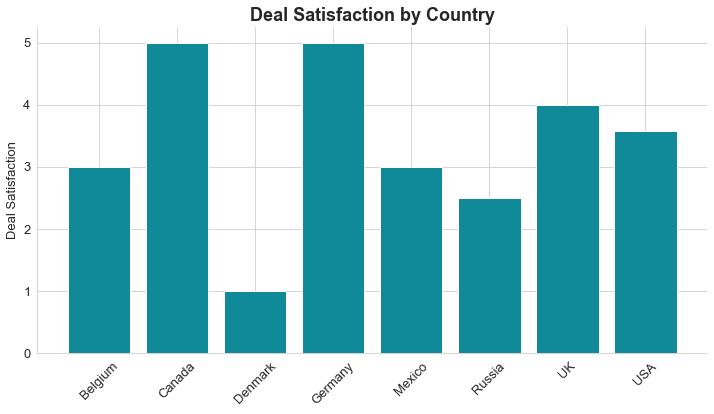

In [120]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) #determine the size of the chart

plt.bar(x = averages_by_country.index, #specify the x axis
        height = averages_by_country['deal_satisfaction'], #specify the y axis
        color = "#108A99") # the color for the bars (365 Data Science color)
# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.savefig("deal_satisfaction_by_country_bar_chart.png") # you can export your chart as a picture

plt.show()

##  Customer Age Distribution (Histogram) (Histogram)

1. Тo visualize the distribution of customer ages at the time of purchase, we'll generate a histogram. The necessary data for this visualization is already included in the data variable.
2. Histogram construction: We use the <strong>data</strong> variable to create a histogram that represents the age distribution at purchase.The histogram should incorporate the following parameters:
    - white background with a grid
    - size of the figure (12,6)
    - 10 bins for the different categories
    - fitting color which is not the default one
    - appropriate x and y labels
    - remove the top and the right border of the chart
    - save the newly created figure as a .png on your computer

In [121]:
# let's get started by checking what our data is
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


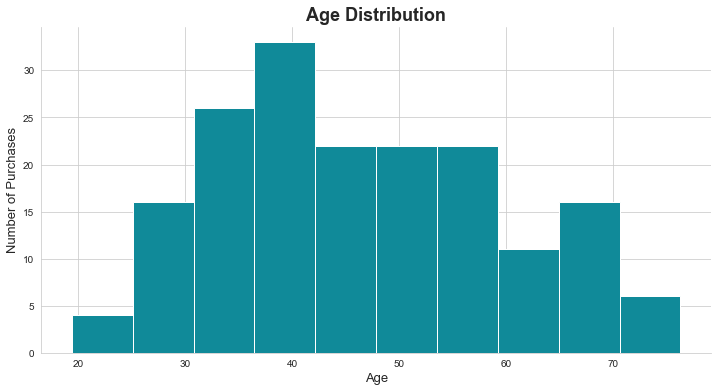

In [122]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.savefig("age_distribution_histogram.png") # you can export your chart as a picture

plt.show()

## Segmentation by State (Pareto diagram)

This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state. For example, there are 4 customers from Virginia.

The secondary axis (the orange line), shows the cumulative frequency. For example, California, Nevada, and Oregon together, account for 82% of all purchases. 

In [123]:
# we have already created such a table before
sold_by_state

# in fact, we have also sorted it by frequency

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


In [124]:
# we need to import the relevant library to plot the percentages on the second y-axis
from matplotlib.ticker import PercentFormatter

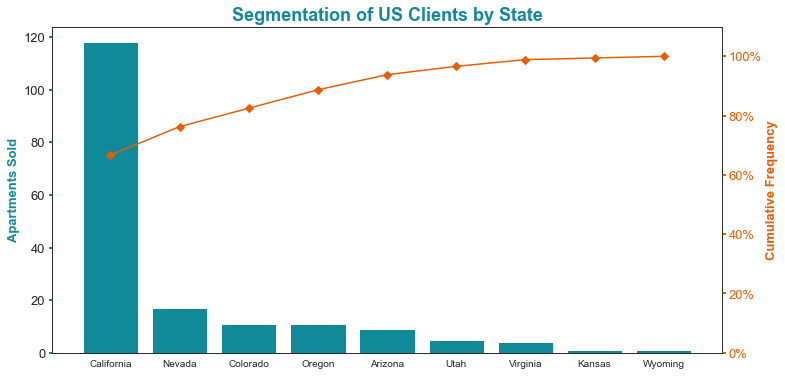

In [144]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, removing the grey background and grid for a cleaner look.

sns.set_style("white") 

# To create the Pareto diagram, we first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of our visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")
# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")
# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a descriptive and engaging title to our visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

## Total Sales per Year (Line chart)

In [126]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [127]:
# We need to create a line chart detailing total sales per year. However, our dataset doesn't currently contain a breakdown by year.
# Our dataset lacks a categorical variable representing the year of purchase, even though it does include timestamp information.

# In data analytics, it's common to backtrack and add in missing features that become necessary later on.

# We have previously processed the 'age at purchase' in a similar manner. The 'date_sale' column is currently in datetime format.
# To manipulate this data for our purposes, we need to convert the year portion of the date into an integer.
data['date_sale'][0].year

2005

In [128]:
# We do that for the whole series and save the year in a separate column
data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [129]:
# We need to convert the 'year_sale' variable type from float to int as fractional years don't accurately represent our data.
# To modify the data type, we employ the 'astype' method. Since this function cannot handle missing values, we initially replace all NAs with zeros.
data['year_sale'] = data['year_sale'].fillna(0).astype(int)

# Subsequently, we convert all zeros back to NA, restoring our dataset's missing value representation.
data['year_sale'] = data['year_sale'].replace({0:pd.NA})


In [130]:
# Next, we formulate the desired sales breakdown by year.
# We choose the columns of interest, 'year_sale' and 'price$', and sum all sales for each year.
columns_of_interest = ['year_sale','price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# For clarity, we rename the 'price$' column to 'revenue$'.
revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


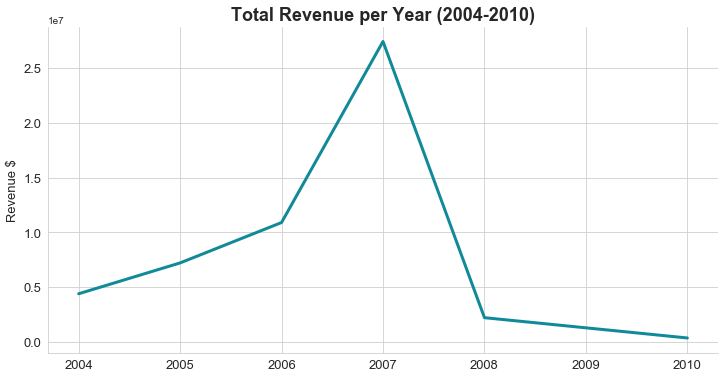

In [145]:
# Let's override the default matplotlib style, opting for a white grid layout.
sns.set_style("whitegrid")

# We'll generate a figure that aligns aesthetically with our other visualizations.
plt.figure(figsize = (12, 6))

# A line chart will be constructed to represent revenue per year.
plt.plot(revenue_per_year['revenue$'], 
         color='#108A99', 
         linewidth=3)

# Let's ensure our visualization includes essential chart elements like title, labels, and legends.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $", fontsize = 13)
plt.xticks(fontsize = 13) # We'll format and adjust the orientation of labels on the x-axis.
plt.yticks(fontsize = 13) # y-axis label formatting

sns.despine() # We'll remove the top and right borders of the chart for a cleaner look.

# Don't forget to save the visualization as an image file.
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

plt.show() # Finally, display the visualization.

In [132]:
# Several issues detract from the effectiveness of our graph:
# 1. Revenue figures are displayed in scientific notation, which is not readily interpretable.
# 2. The year 2009 lacks its own tick mark, due to its absence from the revenue_per_year dataframe.

# Currently, revenue is represented in dollars, but the figures are large and overwhelming.
# For a cleaner, more comprehensible visualization, we should present revenue in thousands or millions.
# To simplify this, we'll create a new Series named 'revenue$inM'.
revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [133]:
revenue_per_year

,revenue$,revenue$inM
year_sale,,
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2010,357538.20,0.357538


In [134]:
# To improve our data representation, we'll add a new data point for the year 2009.
# This year will display 0 revenue, reflecting the actual situation.
# This inclusion aids in presenting a more accurate reality.
revenue_per_year_adj = revenue_per_year.copy() 
# Adding a new row for the year 2009 with 0 revenue.
revenue_per_year_adj = revenue_per_year_adj.append({'revenue$': 0, 
                                                    'revenue$inM': 0},
                                                    ignore_index=True)
# Adjusting the index to include 2009.
revenue_per_year_adj.index = ['2004','2005','2006','2007','2008','2010','2009']
# Reordering the dataframe to chronologically arrange the years.
revenue_per_year_adj = revenue_per_year_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]
revenue_per_year_adj

,revenue$,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


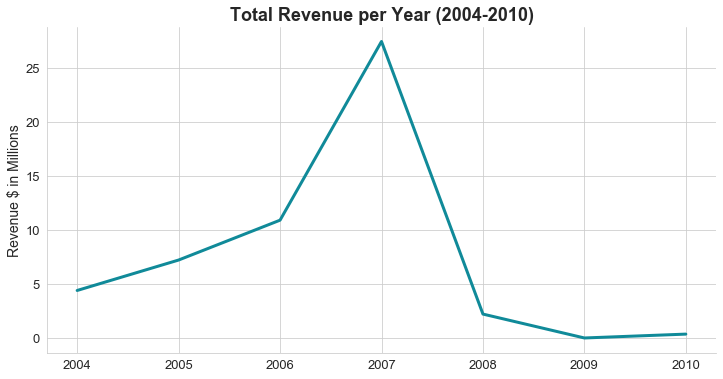

In [146]:
# Let's now plot with the adjusted data.

sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#108A99', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() # Display the chart.

## Yearly Sales Distribution Across Buildings (Stacked Area Chart)
We're going to create a stacked area chart that displays the distribution of yearly sales across various buildings. Follow these step-by-step instructions:
1. <strong>Initialize a checkpoint dataframe:</strong> Establish a new variable named <strong>data_stacked_area</strong> which will be our checkpoint for further computations.
2.  <strong>Formulate building indicators:</strong> Construct indicator (or dummy) variables rooted in <strong>building</strong>. These can be stored directly in data_stacked_area. An alternate approach involves two steps: creating a separate <strong>building_dummies</strong> variable, and then appending it to <strong>data_stacked_area</strong>.
3. <strong>Redefine column names:</strong> Amend the names of the dummy variables to be more descriptive. Simple labels such as 'building1', 'building2', etc. should work well.
4. <strong>Exclude unsold properties:</strong> Remove all properties from the dataset that haven't been sold.
5. <strong>Generate a yearly breakdown:</strong> Develop a breakdown by year for the 5 building dummy variables. This will yield a yearly sales distribution per building.
6. <strong>Create a stacked area chart:</strong> With the data prepared, it's time to create the stacked area chart: 
    - Background: Opt for a white background with a grid.
    - Figure size: Set the dimensions as (12,6).
    - Color scheme: Use a 5-color scheme, with colors that distinctly represent the 5 buildings. 
    - Edgecolor: This should be none.
    - Legend: Include a legend that maps the colors to their corresponding labels.
    - Axes labels: Assign an x label and y label, both with a font size of 13.
    - Chart borders: Discard the top and right borders of the chart.
    - Save the figure: Store the final chart as a .png file on your local machine

One point to keep in mind, as we noted during the Line Chart creation, the year 2009 isn't present in the data frame we are plotting. Hence, its corresponding value (0) isn't marked. To address this, generate a new stacked area chart that includes the year 2009 as an observation.

In [136]:
# For the next steps, we'll need to preprocess the data.
# Thus, let's create a new data variable for this purpose.
data_stacked_area = data.copy()

In [137]:
# Our goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# We need to split this into separate entities, resulting in five dummy variables.
building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [138]:
# Now, let's incorporate these dummy variables into our main dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [139]:
# next, we can rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,1,0,0,0,0


In [140]:
# Finally, let's filter out only the sold apartments, as they are the only ones of interest.
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [141]:
# to make the breakdown by year and by bulding
# we include the 'year_sale' variable and all the bulding dummies
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

# the result is the data per year and per building

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


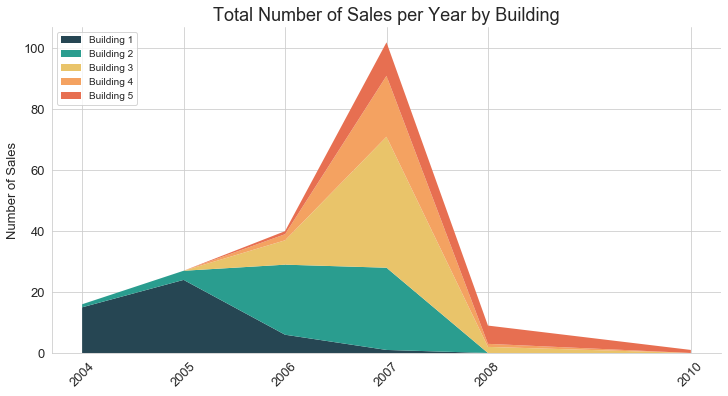

In [147]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "E9C46A",'F4A261','E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

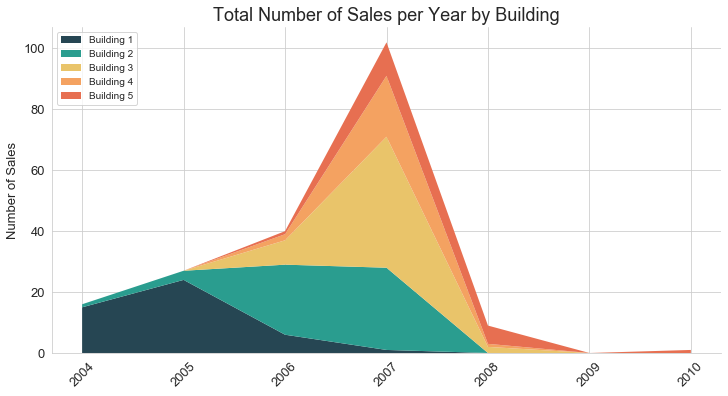

In [148]:
# To include 2009 in the graph, we need to adjust the dataframe.

# Copy the original dataframe to maintain its integrity.
stacked_area_adj = stacked_area.copy() 

# Append a new row for 2009 with 0 values for all buildings as there were no sales.
stacked_area_adj = stacked_area_adj.append({'building1': 0, 
                                     "building2": 0, 
                                     "building3": 0,
                                     "building4": 0,
                                     "building5": 0},ignore_index=True)

# Adjust the index to include 2009.
stacked_area_adj.index = ['2004','2005','2006','2007','2008','2010','2009']
stacked_area_adj = stacked_area_adj.loc[['2004','2005','2006','2007','2008','2009','2010']]

######################################################################################################

# Assign unique colors to each building for differentiation.
colors = ["#264653", "#2A9D8F", "E9C46A",'F4A261','E76F51']

# Define a list of labels for the legend. 
# These should match the order of the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Use seaborn's 'whitegrid' style for a clean background and grid lines.
sns.set_style("whitegrid")

# Create a figure that aligns with the dimensions of previous figures.
plt.figure(figsize = (12, 6))

# Generate the stacked area plot.
plt.stackplot(stacked_area_adj.index, # The x-axis uses the index (the year).
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              colors = colors,
              edgecolor = 'none')

# Format the ticks and add a legend.
plt.xticks(stacked_area_adj.index, rotation = 45) # Rotate x-axis labels by 45 degrees for clarity.
plt.legend(labels = labels, loc = "upper left") # Add a legend, specifying its position on the chart.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13) # Format the x-axis labels.
plt.yticks(fontsize = 13) # Format the y-axis labels.

# Set the title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove the top and right borders of the chart for a clean appearance.
sns.despine()

# Save the chart as an image for future use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart_v2.png")

# Display the chart.
plt.show()